In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df_path = '/content/drive/MyDrive/Churn_Modelling.csv'
df = pd.read_csv(df_path)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [28]:
#checks if there are any duplicated rows
df.duplicated().sum()

0

In [29]:
#check how many customers have exited the bank
df['Exited'].value_counts()
#there are around 8k people on the bank and 2k have left the bank

,count
Exited,
0,7963
1,2037


In [30]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [31]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [32]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [33]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [34]:
#performing one hot encoding in certain columns
df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [35]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [36]:
X_train.shape


(8000, 11)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [39]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [40]:
#the next step is to build the keras model there are two types of models that we can build using keras, sequential and non sequential models,
#for this particular project we are going to build sequential model

In [41]:
model = Sequential()
model.add(Dense(11,activation='relu', input_dim = 11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
#model compilation
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [51]:
history = model.fit(X_train_scaled, y_train,epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8731 - loss: 0.3127 - val_accuracy: 0.8587 - val_loss: 0.3440
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8701 - loss: 0.3097 - val_accuracy: 0.8594 - val_loss: 0.3419
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8705 - loss: 0.3161 - val_accuracy: 0.8606 - val_loss: 0.3428
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8680 - loss: 0.3143 - val_accuracy: 0.8606 - val_loss: 0.3427
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8668 - loss: 0.3167 - val_accuracy: 0.8612 - val_loss: 0.3442
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8678 - loss: 0.3211 - val_accuracy: 0.8556 - val_loss: 0.3433
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8669 - loss: 0.3137 - val_accuracy: 0.8575 - val_loss: 0.3432
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8654 - loss: 0.3261 - val_accu

In [45]:
model.layers[1].get_weights()

[array([[ 0.05835043, -0.4158808 ,  0.26248527, -0.31478783,  0.1643932 ,
          0.40438798,  0.04681719,  0.0062651 ,  0.1471858 , -0.50151074,
          0.0779176 ],
        [ 0.73920673,  0.6031246 , -0.17425269,  0.62885505, -0.58589715,
          0.14084315,  0.16656363, -2.4328105 ,  0.10239273, -0.11167789,
          0.34214675],
        [ 0.02877571,  0.53488564, -0.30902958, -0.1910607 ,  0.17915373,
          0.36574346,  0.443251  , -0.85530114, -0.07924928, -0.02448879,
          0.92046887],
        [-0.40920168,  0.1577484 , -0.4660069 , -0.09409474,  0.14029245,
         -1.1488898 ,  0.19895528, -0.88386047, -0.53595567, -1.9358304 ,
         -0.06363105],
        [-0.11334281, -0.24692743, -0.37268177,  0.5460496 , -0.4798199 ,
          0.02151705, -0.3514603 , -1.3914244 , -0.340545  ,  0.90516335,
         -0.00469034],
        [-0.5291315 ,  0.5248183 ,  0.24059235, -0.05694538,  0.14513521,
         -0.23775662,  0.01861617, -0.9724387 ,  0.27696383, -1.0146601

In [46]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [47]:
y_pred = np.where(y_log>0.5,1,0)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8695

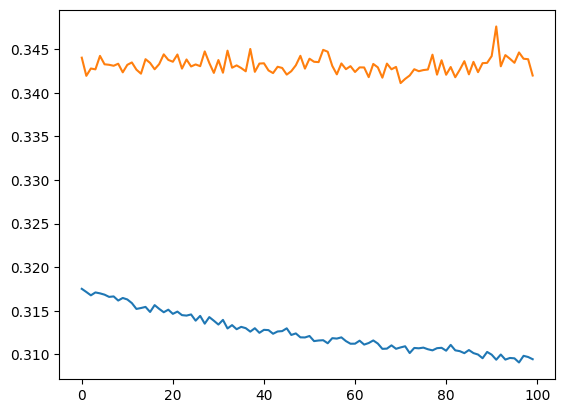

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

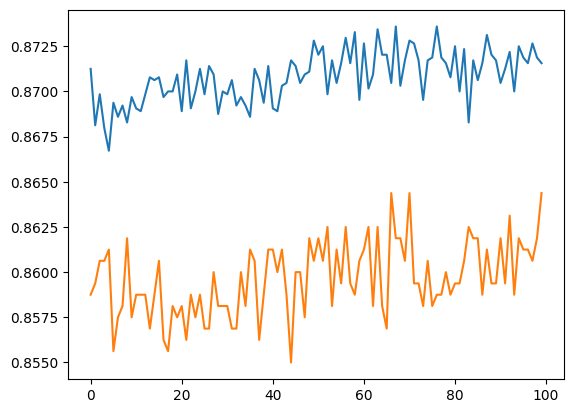

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [59]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1585
           1       0.79      0.50      0.61       415

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000

